# KIKS
Sint-Bavohumaniora, KA Etterbeek, UGent, Plantentuin Meise, Accenture

# ReLU

Om een neuraal netwerk op te bouwen, heeft men een **activatiefunctie** nodig. ReLu is een veelgebruikte activiatiefunctie. 

In het volgende voorbeeld beschouwt men blauwe en groene punten in het vlak. Van elk punt is de coördinaat en de kleur gegeven.

## De nodige modules importeren

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

## 1. Inlezen van de data

Lees met de module `pandas` de dataset in.

In [2]:
punten = pd.read_csv("data.dat", header=None)  # in te lezen tabel heeft een hoofding

## 2. Tonen van de ingelezen data

Bekijk de data. De dataset bestaat uit de x- en y-coördinaat van de punten - deze coördinaten worden beschouwd als kenmerken - en de kleur van elk punt, een label. <br> Omdat er twee soorten labels zijn, zegt men dat de punten verdeeld zijn over twee klassen.

In [19]:
punten[:]

,0,1,2
0,0.74,8.55,blauw
1,-0.61,8.37,blauw
2,-1.82,11.30,blauw
3,-1.48,10.20,blauw
4,2.00,12.00,blauw
5,1.35,9.83,blauw
6,-3.48,11.09,groen
7,-3.21,9.29,groen
8,-2.90,7.41,groen
9,-2.29,4.23,groen


Deze tabel komt overeen met een matrix met 15 rijen en 3 kolommen: <br>
15 punten, 2 kenmerken (x1, x2) en 1 label (y) <br><br>
De kenmerken:<br>
- eerste kolom: x-coördinaat 
- tweede kolom: y-coördinaat<br><br>

Het label:<br>
- derde kolom: kleur

## 3. Onderzoek of de punten van elkaar kunnen gescheiden worden

## 3.1 Visualiseren van de data: coördinaten nodig

In [4]:
# coördinaten van de punten
X = punten.iloc[:, [0, 1]].values  
X.shape        

(15, 2)

In [5]:
print(X[:, 0])    # eerste kolom van X: x-coördinaat
print(X[:, 1])    # tweede kolom van X: y-coördinaat

[ 0.74 -0.61 -1.82 -1.48  2.    1.35 -3.48 -3.21 -2.9  -2.29 -1.35  0.22
  2.1   2.39  3.39]
[ 8.55  8.37 11.3  10.2  12.    9.83 11.09  9.29  7.41  4.23  0.81 -0.95
  3.43  4.69 10.5 ]


## 3.2 De data weergeven in puntenwolk

In [6]:
x1 = X[:, 0]  # kenmerk: x-coördinaat
x2 = X[:, 1]  # kenmerk: y-coördinaat
print(x1.min(), x1.max())
print(x2.min(), x2.max())

-3.48 3.39
-0.95 12.0


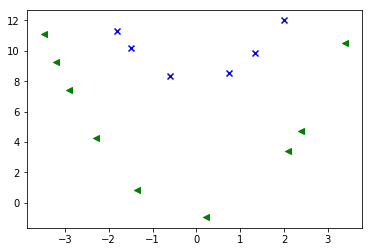

In [7]:
plt.scatter(x1[:6], x2[:6], color="blue", marker="x")    
plt.scatter(x1[6:], x2[6:], color="green", marker="<") 

plt.show()

Het is duidelijk dat deze punten **niet lineair scheidbaar** zijn. Het is onmogelijk één rechte te vinden, die de groene punten afscheidt van de blauwe.

Met een kromme zou het wel gaan. 

## 4. Classificatie

## 4.1 Een scheiding

Zoals uit het volgende script blijkt, kunnen er wel twee rechten gevonden worden die gebruikt kunnen worden om een scheiding te realiseren.

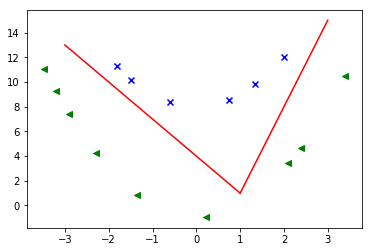

In [15]:
# scheiding ('decision boundary')
plt.scatter(x1[:6], x2[:6], color="blue", marker="x")    
plt.scatter(x1[6:], x2[6:], color="green", marker="<") 

x_1 = np.linspace(-3, 1, 10)
x_2 = np.linspace(1, 3, 10)
y_r_1 = 7 * x_2 - 6
y_r_2 = -3 * x_1 + 4
plt.plot(x_2, y_r_1, color="red")
plt.plot(x_1, y_r_2, color="red")

plt.show()

## 4.2 Twee gebieden

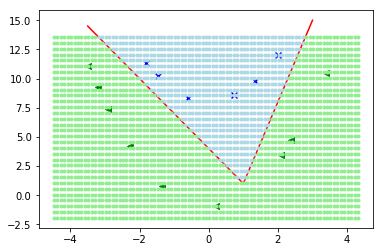

In [36]:
plt.scatter(x1[:6], x2[:6], color="blue", marker="x")    
plt.scatter(x1[6:], x2[6:], color="green", marker="<") 

x_1 = np.linspace(-3.5, 1, 10)
x_2 = np.linspace(1, 3, 10)
y_r_1 = 7 * x_2 - 6
y_r_2 = -3 * x_1 + 4
plt.plot(x_2, y_r_1, color="red")
plt.plot(x_1, y_r_2, color="red")


# resolution = 0.2
xx1 = np.arange(x1.min()-1, x1.max()+1, 0.1)
xx2 = np.arange(x2.min()-1, x2.max()+2, 0.5)                     

for a in xx1:
    for b in xx2:
        if (7 * a - b - 6 <= 0) and (-3 * a - b + 4 <= 0):
            kleur = "lightblue"
        else:
            kleur = "lightgreen"
        plt.plot(a, b, marker='.', color=kleur)

## 4.3 ReLU

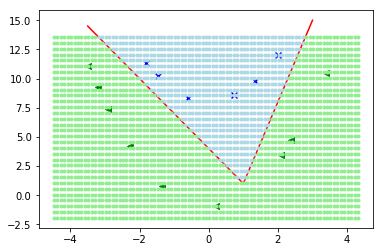

In [35]:
def ReLU(x):
    """ReLU(x) = max(x,0). """
    ReLU = 0
    if x > 0:
        ReLU = x
    return ReLU

def fi(x, y):
    som = ReLU(7 * x - y - 6) + ReLU(-3 * x - y + 4)
    return som


plt.scatter(x1[:6], x2[:6], color="blue", marker="x")    
plt.scatter(x1[6:], x2[6:], color="green", marker="<") 

x_1 = np.linspace(-3.5, 1, 10)
x_2 = np.linspace(1, 3, 10)
y_r_1 = 7 * x_2 - 6
y_r_2 = -3 * x_1 + 4
plt.plot(x_2, y_r_1, color="red")
plt.plot(x_1, y_r_2, color="red")


# resolution = 0.2
xx1 = np.arange(x1.min()-1, x1.max()+1, 0.1)
xx2 = np.arange(x2.min()-1, x2.max()+2, 0.5)                     

for a in xx1:
    for b in xx2:
        if fi(a, b) == 0:
            kleur = "lightblue"
        else:
            kleur = "lightgreen"
        plt.plot(a, b, marker='.', color=kleur)

# 5. Classificatie met ML

## 5.1 Geannoteerde data

Kan het AI-systeem een soortgelijke scheiding vinden? <br>
Het AI-systeem zal machinaal leren uit de **gelabelde** punten.<br> 
Lees de labels in.

In [37]:
y = punten.iloc[:, 2].values         # labels: laatste kolom van de oorspronkelijke tabel
y = np.where(y == "blauw", 1, 0)     # labels numeriek maken, blauw:1, groen:0

## 5.2 Met 2 layers

Als twee klassen lineair scheidbaar zijn, kan men een rechte vinden die beide klassen scheidt. Man kan de vergelijking van de scheidingslijn zodanig opschrijven (in de vorm ax+by+c=0) dat voor elk punt (x1, y1) in de ene klasse ax1+by1+c >= 0 en voor elk punt (x1, y1) in de andere klasse ax1 +by1=c < 0. <br> 
Zolang dit niet voldaan is, moeten de coëfficiënten worden aangepast.<br>
De trainingset met bijhorende labels wordt enkele keren doorlopen. Voor elk punt worden de coëfficiënten aangepast indien nodig.

In [48]:
def grafiek(cte, coeff_x1, coeff_x2):
        """Plot scheidingsrechte ('decision boundary') en geeft vergelijking ervan."""
        
def ReLU(x):
    """ReLU(x) = max(x,0). """
    b = np.empty()
    for a in x:    
        ReLU = 0
        if a > 0:
            ReLU = a
        b.append(RelU)    
    return b

class Neuraalnetwerk:
    """Neuraal netwerk met drie lagen, twee neuronen per laag.""" 
    
    def __init__(self, learningrate, inputnodes, hiddennodes, outputnodes):
        """self heeft drie parameters: leersnelheid, aantal inputneuronen, aantal outputneuronen."""
        self.eta = learningrate
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.wih = (np.random.rand(self.hnodes, self.inodes) - 0.5)
        self.who = (np.random.rand(self.onodes, self.hnodes) - 0.5)
        self.activation_function = ReLU
        # self.activation_function = lambda x: scipy.special.expit(x)

    def train(self, X, y):
        """Fit training data."""
        inputs = np.array(X, ndmin=2).T
        targets = np.array(y).T
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors)
        self.who += self.lr *np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        self.wih += self.lr *np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
    def query(self, inputs_list):
        """converteert inputs tot 2D array, berekent signalen"""
        inputs = np.array(inputs_list, ndim=2).T
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)  
        return final_outputs

Maak een object van de klasse `Neuraalnetwerk`.

In [49]:
# neuraal netwerk, leersnelheid = 0.3, telkens twee input-, output- en hidden neuronen
nn = Neuraalnetwerk(0.3, 2, 2, 2)

In [50]:
nn.train(X, y)

TypeError: Required argument 'shape' (pos 1) not found

Gelukt!